## Part 1
Hint: Convert all the currencies to dollars using the following logic:
1 PKR = 0.0036 USD
1 INR = 0.011 USD
1 CNY = 0.14 USD
1 AED = 0.27 USD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('mobiles_dataset.csv')

In [2]:
df['Launched.Price.Pakistan.USD'] = df['Launched.Price.Pakistan.PKR'] * 0.0036
df['Launched.Price.India.USD'] = df['Launched.Price.India.INR'] * 0.011
df['Launched.Price.China.USD'] = df['Launched.Price.China.CNY'] * 0.14
df['Launched.Price.USA.USD'] = df['Launched.Price.USA.USD']  # Already in USD
df['Launched.Price.Dubai.USD'] = df['Launched.Price.Dubai.AED'] * 0.27

1. Does battery capacity influence the launched price of a smartphone? Check this variability
across all currencies. Is there any type of difference between behaviors?

In [3]:
battery_price_corr = {
    'Pakistan': df['Battery.Capacity.mAh'].corr(df['Launched.Price.Pakistan.USD']),
    'India': df['Battery.Capacity.mAh'].corr(df['Launched.Price.India.USD']),
    'China': df['Battery.Capacity.mAh'].corr(df['Launched.Price.China.USD']),
    'USA': df['Battery.Capacity.mAh'].corr(df['Launched.Price.USA.USD']),
    'Dubai': df['Battery.Capacity.mAh'].corr(df['Launched.Price.Dubai.USD'])
}

print("Correlation between battery capacity and launch price in USD for each currency:")
for country, correlation in battery_price_corr.items():
    print(f"{country}: {correlation:.4f}")

Correlation between battery capacity and launch price in USD for each currency:
Pakistan: -0.0609
India: -0.0191
China: -0.0410
USA: -0.0411
Dubai: -0.0489


As the correlation is between the battery capacity and different currencies is small negative it means that the battery capacity does not influence the launched capacity significantly. For different currencies, there is minor differences between correlation, for example it is a bit smaller for Pakistan currency compared to other currencies and for the case of Indian currency it is the highest among all, but the difference is not that significant.

2. Does RAM size impact the price of smartphones? Check this variability across all currencies.
Is there any type of difference between behaviors?

In [8]:
df['RAM_numeric'] = df['RAM'].str.replace('GB', '') 
df['RAM_numeric'] = df['RAM_numeric'].str.split(' /').str[0]
df['RAM_numeric'] = pd.to_numeric(df['RAM_numeric'])

ram_price_corr = {
    'Pakistan': df['RAM_numeric'].corr(df['Launched.Price.Pakistan.USD']),
    'India': df['RAM_numeric'].corr(df['Launched.Price.India.USD']),
    'China': df['RAM_numeric'].corr(df['Launched.Price.China.USD']),
    'USA': df['RAM_numeric'].corr(df['Launched.Price.USA.USD']),
    'Dubai': df['RAM_numeric'].corr(df['Launched.Price.Dubai.USD'])
}

print("Correlation between RAM and launch price in USD for each currency:")
for country, correlation in ram_price_corr.items():
    print(f"{country}: {correlation:.4f}")

Correlation between RAM and launch price in USD for each currency:
Pakistan: 0.4089
India: 0.4161
China: 0.4216
USA: 0.4619
Dubai: 0.4730


The correlation between the RAM and the price of the smartphones is high positive meaning that the size of the RAM impacts the price significantly. The higher the RAM, higher is the price of the smartphone. There is small difference between different currencies. For example, the highest correlation is with AED, meaning that the influence is higher with that currency when with others, but in general, the correlation is quite close between all of them. 

3. Do Apple devices have a higher price variation across different regions compared to other
brands? In which country do Apple devices have the highest markup? Are there brands with
more stable pricing across regions?

In [9]:
df['Average_Price_USD'] = df[['Launched.Price.Pakistan.USD', 'Launched.Price.India.USD', 
                               'Launched.Price.China.USD', 'Launched.Price.USA.USD', 
                               'Launched.Price.Dubai.USD']].mean(axis=1)

brand_price_variation = df.groupby('Company.Name')['Average_Price_USD'].agg(['max', 'min', 'std'])
brand_price_variation['Price_Range'] = brand_price_variation['max'] - brand_price_variation['min']
brand_price_variation = brand_price_variation.sort_values(by='std', ascending=False)\

print("Brand Price Variation:")
print(brand_price_variation[['Price_Range', 'std']])

Brand Price Variation:
              Price_Range         std
Company.Name                         
Huawei         2091.20000  589.894591
Samsung        1886.73928  504.560602
Sony           1028.00000  390.869735
Honor          1577.60000  387.395262
Tecno          1680.46000  362.057745
Google         1449.20000  347.291789
Xiaomi          836.80000  266.604923
Oppo           1285.54600  265.035343
Motorola       1201.30000  260.783781
Apple          1433.80000  255.625146
Vivo           1143.00000  255.471018
OnePlus         874.40000  224.529782
Lenovo          504.80000  171.261667
POCO            361.60000  103.721302
Realme          425.00000   97.917454
Infinix         405.08000   94.336213
iQOO            116.00000   58.090045
Nokia           140.60000   44.838344
Poco             21.38000   15.117943


To check the price variation between different brands, we need to calculate the standard deviation of different brands. Higher the SD, higher price variations across different regions. From the table we can see that the highest price variation has Huawei smartphones and compared to all brands, Apple smartphones are on the 10th place with lower price variation.

In [10]:
apple_df = df[df['Company.Name'] == 'Apple']
avg_global_price = apple_df['Average_Price_USD'].mean()

apple_prices = {
    'Pakistan_Markup': apple_df['Launched.Price.Pakistan.USD'].mean() / avg_global_price,
    'India_Markup': apple_df['Launched.Price.India.USD'].mean() / avg_global_price,
    'China_Markup': apple_df['Launched.Price.China.USD'].mean() / avg_global_price,
    'USA_Markup': apple_df['Launched.Price.USA.USD'].mean() / avg_global_price,
    'Dubai_Markup': apple_df['Launched.Price.Dubai.USD'].mean() / avg_global_price
}

max_markup_country = max(apple_prices, key=apple_prices.get)
print(f"\nApple devices have the highest markup in: {max_markup_country}")


Apple devices have the highest markup in: India_Markup


The stabilility of the brand depends on the price variation. Lower the price variation, more stable the brand is. The brands which are the most stable are Poco, Nokia and iQOO.

4. Do all smartphone brands have flagship and budget-friendly models, or do some brands
only focus on premium devices?
Hint: Categorize brands into budget, mid-range, and premium segments (Budget: < $300,
Mid-range: $300 - $700, Premium: > $700). Check how many models each brand has in
each segment. Determine whether a brand covers all three segments or focuses only on
premium/mid-range.

In [12]:
def categorize_price(price):
    if price < 300:
        return "Budget"
    elif 300 <= price <= 700:
        return "Mid-range"
    else:
        return "Premium"

df['Price_Category'] = df['Launched.Price.USA.USD'].apply(categorize_price)

brand_segments = df.groupby(['Company.Name', 'Price_Category']).size().reset_index(name='Count')

print(brand_segments.head())

  Company.Name Price_Category  Count
0        Apple      Mid-range      8
1        Apple        Premium     89
2       Google      Mid-range     12
3       Google        Premium      9
4        Honor         Budget     29


From all the models, Apple is the only one that has almost only premium mdoels. Other brands have mid-range and budget-friendly brands as well.

5. Which region offers the most affordable smartphone prices on average? Are there any
brands that price their phones significantly lower in one region compared to others?

In [14]:
avg_prices_region = {
    'Avg_Price_Pakistan': df['Launched.Price.Pakistan.USD'].mean(),
    'Avg_Price_India': df['Launched.Price.India.USD'].mean(),
    'Avg_Price_China': df['Launched.Price.China.USD'].mean(),
    'Avg_Price_USA': df['Launched.Price.USA.USD'].mean(),
    'Avg_Price_Dubai': df['Launched.Price.Dubai.USD'].mean()
}

cheapest_region = min(avg_prices_region, key=avg_prices_region.get)

print("Average Prices by Region:")
print(avg_prices_region)

Average Prices by Region:
{'Avg_Price_Pakistan': np.float64(449.93423870270266), 'Avg_Price_India': np.float64(552.823682162162), 'Avg_Price_China': np.float64(530.7413621621622), 'Avg_Price_USA': np.float64(579.6237837837838), 'Avg_Price_Dubai': np.float64(586.0290162162161)}


From the results, we can see that Pakistan is the region that offers the most affordable smartphone prices on average.


In [15]:
brand_price_comparison = df[['Company.Name', 
                             'Launched.Price.Pakistan.USD', 
                             'Launched.Price.India.USD', 
                             'Launched.Price.China.USD', 
                             'Launched.Price.USA.USD', 
                             'Launched.Price.Dubai.USD']].groupby('Company.Name').mean()

brand_price_comparison['Min_Region'] = brand_price_comparison[['Launched.Price.Pakistan.USD', 
                                                              'Launched.Price.India.USD', 
                                                              'Launched.Price.China.USD', 
                                                              'Launched.Price.USA.USD', 
                                                              'Launched.Price.Dubai.USD']].idxmin(axis=1)

print(brand_price_comparison[['Min_Region']])

                               Min_Region
Company.Name                             
Apple         Launched.Price.Pakistan.USD
Google        Launched.Price.Pakistan.USD
Honor         Launched.Price.Pakistan.USD
Huawei        Launched.Price.Pakistan.USD
Infinix       Launched.Price.Pakistan.USD
Lenovo        Launched.Price.Pakistan.USD
Motorola      Launched.Price.Pakistan.USD
Nokia            Launched.Price.India.USD
OnePlus       Launched.Price.Pakistan.USD
Oppo          Launched.Price.Pakistan.USD
POCO          Launched.Price.Pakistan.USD
Poco          Launched.Price.Pakistan.USD
Realme        Launched.Price.Pakistan.USD
Samsung          Launched.Price.India.USD
Sony             Launched.Price.China.USD
Tecno         Launched.Price.Pakistan.USD
Vivo          Launched.Price.Pakistan.USD
Xiaomi           Launched.Price.China.USD
iQOO          Launched.Price.Pakistan.USD


As we can see from the results, for almost all the brands the region that has lower price compared to others is the Pakistan region. For almost all the brands the difference is quite significant.

## Part 2

1. Plot a bar chart for average price per region in USD.

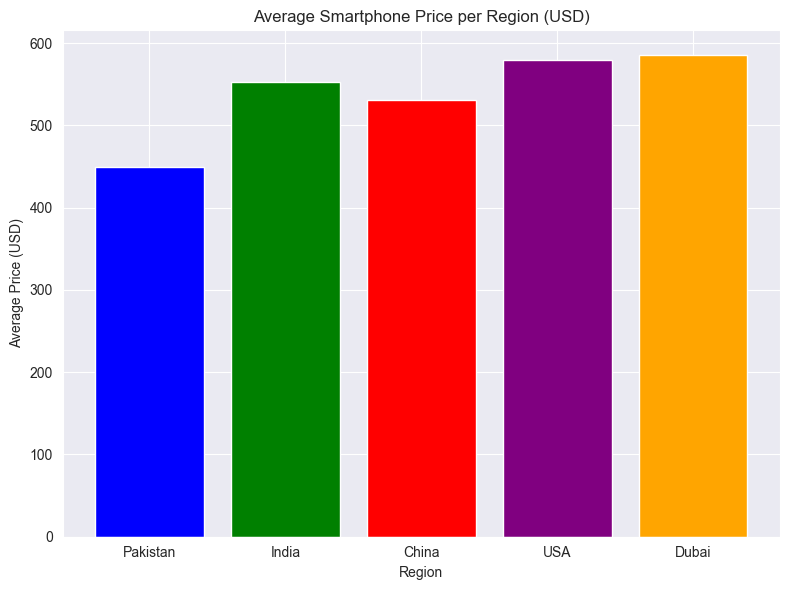

In [17]:
avg_prices_region = {
    'Region': ['Pakistan', 'India', 'China', 'USA', 'Dubai'],
    'Avg_Price': [
        df['Launched.Price.Pakistan.USD'].mean(),
        df['Launched.Price.India.USD'].mean(),
        df['Launched.Price.China.USD'].mean(),
        df['Launched.Price.USA.USD'].mean(),
        df['Launched.Price.Dubai.USD'].mean()
    ]
}

avg_prices_df = pd.DataFrame(avg_prices_region)

plt.figure(figsize=(8, 6))
plt.bar(avg_prices_df['Region'], avg_prices_df['Avg_Price'], color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Average Smartphone Price per Region (USD)')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
plt.tight_layout()

plt.show()

2. Create a pie chart of the market share of smartphone brands.

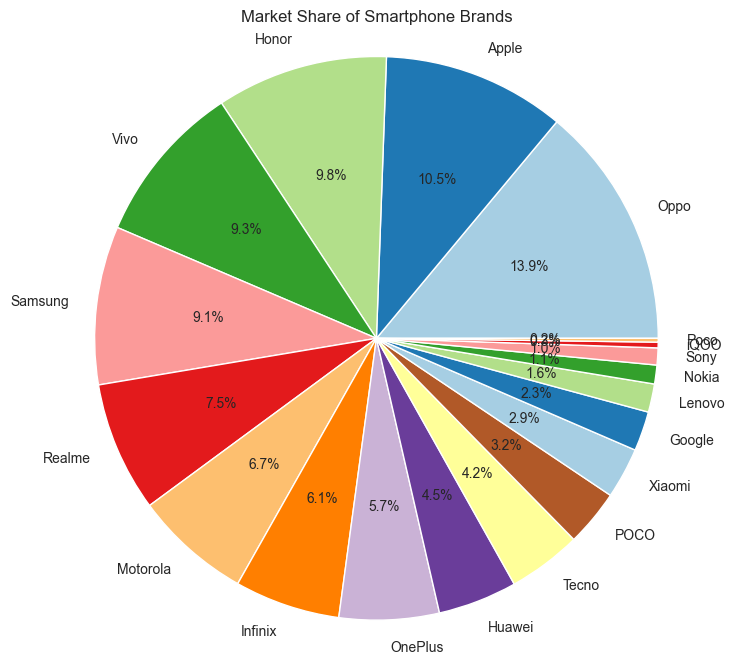

In [18]:
brand_market_share = df['Company.Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(brand_market_share, labels=brand_market_share.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

plt.title('Market Share of Smartphone Brands')
plt.axis('equal')

plt.show()